In [ ]:
#Luyao Wang, Di Jin, Yingqi Lin

In [32]:
#get dataset---matrix
from numpy import*
def LoadDataSet(filename):
    global dataset_ls
    File = open(filename, 'r').readlines()
    dataset =[]
    for line in File:
        stringlist = line.strip('\n').split(',')
        stringlist[0]=float(stringlist[0])
        stringlist[1]=float(stringlist[1])
        dataset.append(stringlist)
    dataset_ls=dataset
    return array(dataset)


In [33]:
# random dict_centroid
def inite_centroid(dataset,dict_centroid,k):
    x_mini= dataset[dataset[:,0].argsort()[0],0]
    y_mini= dataset[dataset[:,1].argsort()[0],1]
    x_Max= dataset[dataset[:,0].argsort()[-1],0]
    y_Max= dataset[dataset[:,1].argsort()[-1],1]
    for i in range(k):#k=3!!!!!!!!!!!!!!!!!!!!!!!
        dict_centroid[i]=(random.uniform(int(x_mini), int(x_Max)),random.uniform(int(y_mini), int(y_Max)))
    return dict_centroid


In [34]:
import numpy as np

#get centroids which is nearest to point1 
def distance(point1, dict_centroid):#point[x,y]
    dic_dist=dict()
    for k in dict_centroid:
        distance= np.sqrt(pow(point1[0]-dict_centroid[k][0],2)+pow(point1[1]-dict_centroid[k][1],2))
        dic_dist[k]=distance
    sort_dist=sorted(dic_dist.items(),key=lambda item:item[1])
    near_c=(sort_dist[0][0],dict_centroid[sort_dist[0][0]])
    return near_c


In [35]:
#update list_cluster
def update_list_cluster(near_c,point1,dataset,list_cluster):
    p1=list(point1)
    i=dataset.index(p1)
    #update
    if len(list_cluster)==0 or list_cluster[i]!=near_c[0]:
        list_cluster[i]=near_c[0]
    return list_cluster
    

In [36]:
#get sub_data
def extract_point(dataset,list_cluster,c):
    list1=list_cluster
    sub_data=[]
    n=0
    while n < len(dataset):
        if list1[n]== c:
            sub_data.append(dataset[n])
        n=n+1
    return sub_data 

In [37]:
#update centroid
def cal_centroids(sub_data):
    A=np.array(sub_data)
    return np.mean(A,axis=0)

In [38]:
import numpy as np

dataset_ls=[]# original data on List
data=LoadDataSet('clusters.txt')#get data on array,and dataset_ls: data on List
#print(dataset_ls,data)

def k_means(filename):
    global Continue #end condition
    global dataset_ls
    global data
    global k
    
    #initialize
    k=3
    dict_centroid=dict()#{'c':(x,y)}    
    list_cluster=['' for n in range(len(data))]#['c']: list
    inite_centroid(data,dict_centroid,k)
    
    
    Continue = True
    times=0
    while (Continue and times<100):
        before=list(list_cluster)
        #reassign centroids
        for point in data:
            near_c=distance(point, dict_centroid)
            update_list_cluster(near_c,point,dataset_ls,list_cluster)
       
        #ideal end condition: centroid stop changing
        if before == list_cluster:
            Continue=False
            
        #recompute centroids
        list1=list_cluster 
        list_cluster_unique = list(set(list1)) 
        difference=[None for n in range(len(list_cluster_unique))]
        for c in list_cluster_unique:
            sub_data=extract_point(data,list_cluster,c)
            new_centroids=cal_centroids(sub_data)
            new_centroids_point=(float(new_centroids[0]),float(new_centroids[1]))
            difference[c]= np.sqrt(pow(new_centroids_point[0]-dict_centroid[c][0],2)+pow(new_centroids_point[1]-dict_centroid[c][1],2))
            dict_centroid[c]= (new_centroids[0],new_centroids[1])
        
        #end condition:differences<0.001
        count=0
        for d in range(len(difference)):
            if difference[d]<0.001:
                count+=1
        if count==3:
            Continue=False
        #end condition: limited times of loop
        times+=1
    return dict_centroid,list_cluster

In [39]:
#run
centroids,clusterAssment=k_means('clusters.txt')
print(centroids)

{0: (5.433123874157894, 4.862675026605265), 1: (-1.0394086163975909, -0.6791968002650602), 2: (2.8834971090689647, 1.358261948)}


In [40]:
import matplotlib.pyplot as plt
#visualize result
def showCluster(data,centroids,clusterAssment):     
    mark = []    
    # draw all samples
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    for i in range(len(data)):
        markIndex = int(clusterAssment[i])
        plt.plot(data[i, 0], data[i, 1], mark[markIndex],markersize = 5)
 
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i][0], centroids[i][1], mark[i], markersize = 12)
 
    plt.show()



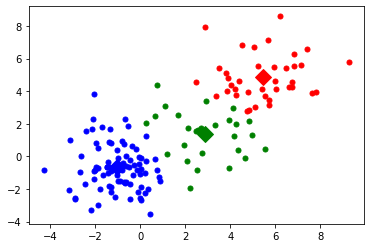

In [41]:
#run
showCluster(data, centroids, clusterAssment)